In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Set start and end dates for the analysis
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2019,12,31)

In [59]:
#Get pricing data on a portfolio of 10 stocks chosed arbitrarily
jpm = web.DataReader('JPM','yahoo',start,end)
gs = web.DataReader('GS','yahoo',start,end)
jnj = web.DataReader('JNJ','yahoo',start,end)
bac = web.DataReader('BAC','yahoo',start,end)
toyota = web.DataReader('TM','yahoo',start,end)
exxon = web.DataReader('XOM','yahoo',start,end)
walmart = web.DataReader('WMT','yahoo',start,end)
cvs = web.DataReader('CVS','yahoo',start,end)
ge = web.DataReader('GE','yahoo',start,end)
costco = web.DataReader('COST','yahoo',start,end)

In [44]:
jpm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717
2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962
2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602


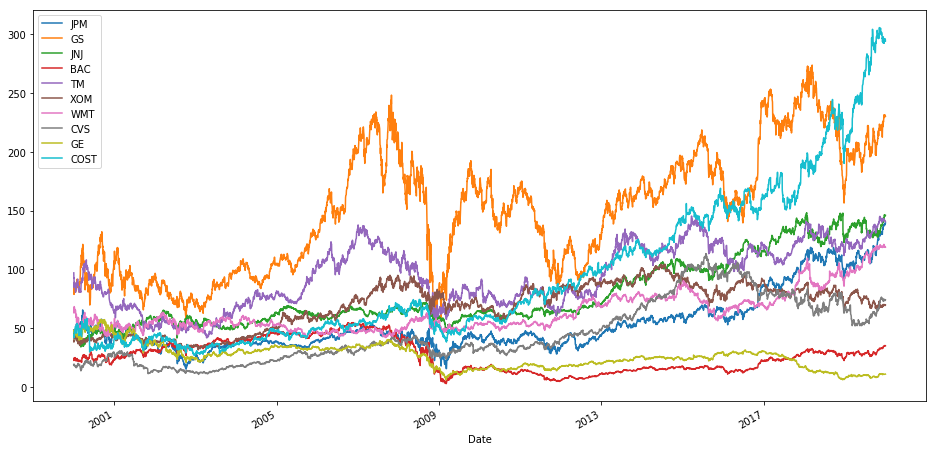

In [60]:
# Price graph for the 10 stocks
jpm['Close'].plot(label='JPM',figsize=(16,8))
gs['Close'].plot(label='GS')
jnj['Close'].plot(label='JNJ')
bac['Close'].plot(label='BAC')
toyota['Close'].plot(label='TM')
exxon['Close'].plot(label='XOM')
walmart['Close'].plot(label='WMT')
cvs['Close'].plot(label='CVS')
ge['Close'].plot(label='GE')
costco['Close'].plot(label='COST')
plt.legend()

In [61]:
#Create column with normalized prices (cumulative returns) on each df
for stock_df in [jpm,gs,jnj,bac,toyota,exxon,walmart,cvs,ge,costco]:
    stock_df['Norm Return'] = stock_df['Close']/stock_df.iloc[0]['Close']

In [62]:
jpm.head()

,High,Low,Open,Close,Volume,Adj Close,Norm Return
Date,,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709,1.000000
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267,0.972556
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717,0.966552
2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962,0.980274
2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602,0.998285


In [63]:
jpm.tail()

,High,Low,Open,Close,Volume,Adj Close,Norm Return
Date,,,,,,,
2019-12-24,137.630005,137.059998,137.330002,137.580002,3324300.0,136.702393,2.831835
2019-12-26,139.100006,137.779999,137.889999,139.039993,6770900.0,138.153076,2.861887
2019-12-27,139.770004,138.669998,139.300003,139.139999,7868200.0,138.252441,2.863945
2019-12-30,140.080002,138.470001,139.899994,138.630005,6963000.0,137.745697,2.853448
2019-12-31,139.479996,138.289993,138.509995,139.399994,7201600.0,138.510773,2.869297


In [64]:
#Add column representing a 10% allocation for each stock multiplied by the normalized price
for stock_df in [jpm,gs,jnj,bac,toyota,exxon,walmart,cvs,ge,costco]:
    stock_df['Allocation'] = stock_df['Norm Return']*.1

In [65]:
jpm.head()

,High,Low,Open,Close,Volume,Adj Close,Norm Return,Allocation
Date,,,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709,1.000000,0.100000
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267,0.972556,0.097256
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717,0.966552,0.096655
2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962,0.980274,0.098027
2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602,0.998285,0.099828


In [66]:
#Assign a column with a notional starting value of $1mm for each position
for stock_df in [jpm,gs,jnj,bac,toyota,exxon,walmart,cvs,ge,costco]:
    stock_df['Position Value'] = stock_df['Allocation']*10000000

In [67]:
jpm.head()

,High,Low,Open,Close,Volume,Adj Close,Norm Return,Allocation,Position Value
Date,,,,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.681709,1.000000,0.100000,1000000.000000
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,26.170267,0.972556,0.097256,972555.771595
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714500.0,26.008717,0.966552,0.096655,966552.314733
2000-01-06,48.625000,46.500000,46.750000,47.625000,8369200.0,26.377962,0.980274,0.098027,980274.468195
2000-01-07,49.000000,47.333332,48.416668,48.500000,6571900.0,26.862602,0.998285,0.099828,998284.760262


In [68]:
#Create a new dataframe to keep track of mark to markets for all positions
portfolio_value = pd.concat([jpm['Position Value'],gs['Position Value'],jnj['Position Value'],
                             bac['Position Value'],toyota['Position Value'],exxon['Position Value'],
                             walmart['Position Value'],cvs['Position Value'],ge['Position Value'],
                             costco['Position Value']],axis=1)

In [69]:
portfolio_value.tail()

,Position Value,Position Value,Position Value,Position Value,Position Value,Position Value,Position Value,Position Value,Position Value,Position Value
Date,,,,,,,,,,
2019-12-24,2.831835e+06,2.603369e+06,3.165939e+06,1.454245e+06,1.455238e+06,1.788220e+06,1.788737e+06,3.941025e+06,232751.989851,6.611910e+06
2019-12-26,2.861887e+06,2.618089e+06,3.163770e+06,1.466632e+06,1.457194e+06,1.791029e+06,1.788887e+06,3.939438e+06,233583.989053,6.645618e+06
2019-12-27,2.863945e+06,2.611861e+06,3.162034e+06,1.459613e+06,1.454620e+06,1.784900e+06,1.789934e+06,3.935207e+06,232544.004928,6.609213e+06
2019-12-30,2.853448e+06,2.602123e+06,3.152271e+06,1.451355e+06,1.447722e+06,1.774429e+06,1.787091e+06,3.898182e+06,230463.997006,6.632360e+06
2019-12-31,2.869297e+06,2.603595e+06,3.164637e+06,1.454245e+06,1.447001e+06,1.782091e+06,1.778709e+06,3.929388e+06,232127.995409,6.604944e+06


In [70]:
portfolio_value.columns= ['jpm Pos','gs Pos','jnj Pos','bac Pos','toyota Pos','exxon Pos','walmart Pos',
                          'cvs Pos','ge Pos','costco Pos']

In [72]:
portfolio_value['Total Pos'] = portfolio_value.sum(axis=1)

In [73]:
portfolio_value.head()

,jpm Pos,gs Pos,jnj Pos,bac Pos,toyota Pos,exxon Pos,walmart Pos,cvs Pos,ge Pos,costco Pos,Total Pos
Date,,,,,,,,,,,
2000-01-03,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+07
2000-01-04,972555.771595,937013.446568,9.633898e+05,9.406452e+05,953667.953668,9.808460e+05,9.625819e+05,9.917355e+05,9.600000e+05,9.452247e+05,9.607660e+06
2000-01-05,966552.314733,893135.173390,9.735593e+05,9.509677e+05,957528.957529,1.034318e+06,9.429373e+05,1.046281e+06,9.583333e+05,9.613764e+05,9.684989e+06
2000-01-06,980274.468195,931351.733900,1.004068e+06,1.032258e+06,872586.872587,1.087789e+06,9.532273e+05,9.719008e+05,9.711459e+05,9.806882e+05,9.785290e+06
2000-01-07,998284.760262,934890.304317,1.046780e+06,1.005161e+06,885456.885457,1.084597e+06,1.025257e+06,9.950413e+05,1.008750e+06,1.045646e+06,1.002986e+07


Text(0.5,1,'Portfolio Mark to Market')

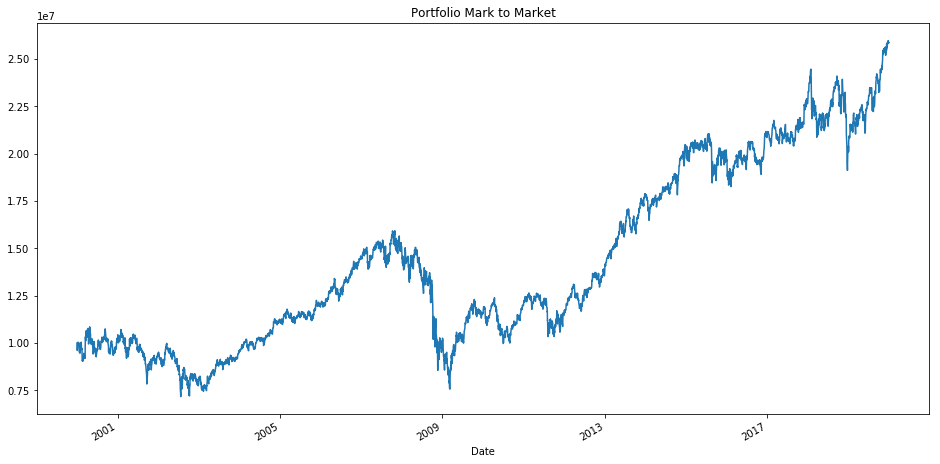

In [74]:
#Graph the mark to market of all positions
portfolio_value['Total Pos'].plot(figsize=(16,8))
plt.title('Portfolio Mark to Market')

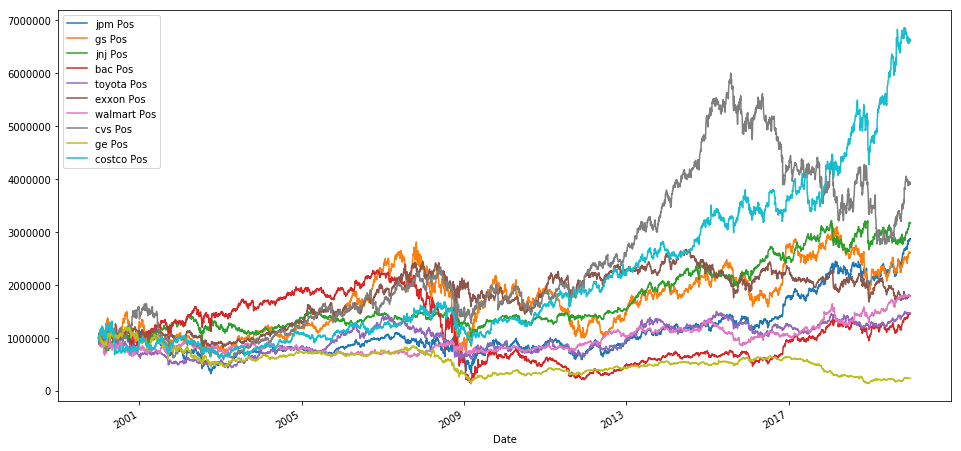

In [75]:
#Graph mark to market on individual positions
portfolio_value.drop('Total Pos',axis=1).plot(figsize=(16,8))

## Portfolio Statistics

In [84]:
#Daily Returns
portfolio_value['Daily Return'] = portfolio_value['Total Pos'].pct_change(1)

In [86]:
#Cumulative Return
cum_ret = 100 * (portfolio_value['Total Pos'][-1]/portfolio_value['Total Pos'][0] -1 )
print('Return for the portfolio was {} percent!'.format(cum_ret))

Return for the portfolio was 158.6603597195952 percent!


In [87]:
#Average daily return
portfolio_value['Daily Return'].mean()

0.0002614567982148063

In [88]:
#Standard deviation of daily returns
portfolio_value['Daily Return'].std()

0.012039738336325882

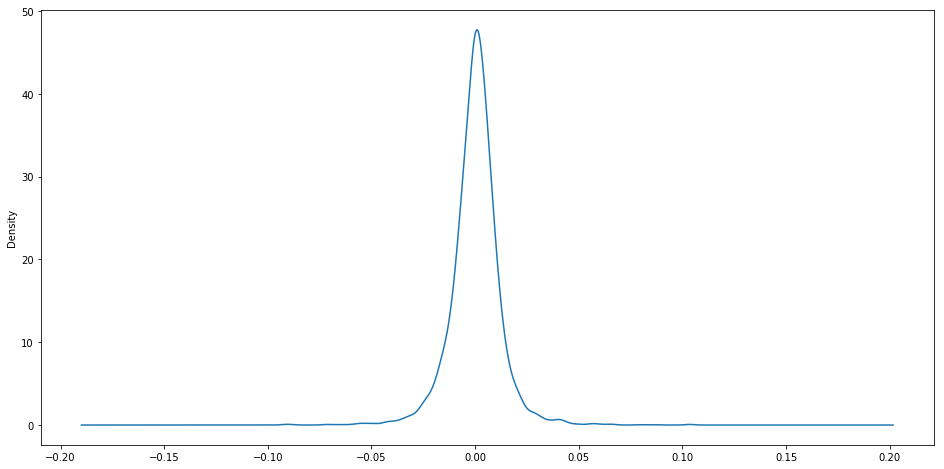

In [89]:
portfolio_value['Daily Return'].plot(kind='kde', figsize=(16,8))

## Sharpe Ratio

In [90]:
#Assuming risk free rate is 0
SR = portfolio_value['Daily Return'].mean()/portfolio_value['Daily Return'].std()

In [91]:
#Daily Sharpe Ratio
SR

0.021716152869032702

In [92]:
#To annualize Sharpe ratio it has to be multiplied by the square root of the numbers of business days in a year
ASR = (252**0.5)*SR

In [93]:
ASR

0.3447332395471341